<a href="https://colab.research.google.com/github/vishnuvmullapudi/LinkedIn-Job-Salary-Prediction/blob/main/Group_9_newmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different Modeling Techniques and their Hyperparameter Tuning


## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing the preprocessed data

In [ ]:
data = pd.read_csv("/content/cleaned_data.csv")

FileNotFoundError: ignored

### After Data preprocessing and cleaning, our Dataset contains 14343 data instances with 14 features.

In [ ]:
data

,job_title,salary,pay_period,work_type,location,experience_level,sponsored,currency,skills,company_name,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
0,Sales Manager,88336.222112,2,1,"Santa Clarita, CA",5,0,USD,"SALE, BD",CargoLogin.,1.0,1,0,0
1,Model Risk Auditor,88336.222112,3,0,"New York, NY",5,0,USD,"ACCT, FIN",Employvision Inc.,1.0,1,0,0
2,NY Studio Assistant,88336.222112,2,1,"New York, NY",5,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0,1,0,0
3,Office Associate,42000.000000,2,1,"Albany, GA",5,1,USD,ADM,Sunnyland Farms,2.0,1,0,0
4,Education Manager,88336.222112,2,1,United States,5,0,USD,"EDU, TRNG",Paradigm Senior Services,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,Sanitation Technician,88336.222112,1,4,"West Columbia, SC",2,0,USD,"ENG, IT",Aspire Bakeries,5.0,0,1,0
14339,Unit Secretary,88336.222112,2,1,"Teaneck, NJ",2,0,USD,ADM,Holy Name Medical Center,5.0,0,1,0
14340,"Radiology Aide, Perdiem",88336.222112,1,4,"Teaneck, NJ",2,0,USD,HCPR,Holy Name Medical Center,5.0,0,1,0
14341,MRI Manager,135000.000000,2,1,"New York, NY",5,0,USD,OTHR,Columbia University Irving Medical Center,7.0,0,1,0


In [ ]:
df = data[['salary','pay_period','work_type','experience_level','sponsored','company_size','category_ComplexOnsiteApply','category_OffsiteApply','category_SimpleOnsiteApply']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14343 entries, 0 to 14342
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary                       14343 non-null  float64
 1   pay_period                   14343 non-null  int64  
 2   work_type                    14343 non-null  int64  
 3   experience_level             14343 non-null  int64  
 4   sponsored                    14343 non-null  int64  
 5   company_size                 14343 non-null  float64
 6   category_ComplexOnsiteApply  14343 non-null  int64  
 7   category_OffsiteApply        14343 non-null  int64  
 8   category_SimpleOnsiteApply   14343 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1008.6 KB


### Below 3 features "experience_level", "pay_period", and "work_type" are choosen as independent variables and "salary" is choosen as our target variable or dependent variable

In [ ]:
X = df[['experience_level','pay_period','work_type']] # Feature
y = df['salary']                                      # Target Variable

## Split the data into training, validation and testing sets using sklearn train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### With the help of sklearn train_test_split we splitted the dataset into two parst train set and test set. So, total 14343 rows are splitted into three sets where 11474 in train set, 1434 rows into validation set  and remaining 1435 in test set.

In [ ]:
X_train.shape

(11474, 3)

In [ ]:
X_val.shape

(1434, 3)

In [ ]:
X_test.shape

(1435, 3)

In [ ]:
y_train.shape

(11474,)

## Scaling the data

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler.transform(y_val.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

## Scaling is done using StandardScaler which is z-score. Scaling is one of the important process in Ml applications to perform so that the model has higher acccuracy.

## Scaled values of X_train, X_val, and X_test

In [ ]:
X_train

array([[ 0.77935155, -0.03795617, -0.13485794],
       [ 0.77935155, -0.03795617, -0.13485794],
       [ 0.77935155, -0.03795617, -0.13485794],
       ...,
       [ 0.77935155, -0.03795617, -0.13485794],
       [ 0.77935155, -0.03795617, -0.13485794],
       [-0.90026522, -0.03795617, -0.13485794]])

In [ ]:
X_val

array([[ 0.72847308, -0.04287203, -0.14191681],
       [ 0.72847308, -2.23853257,  3.21262237],
       [-0.98966902, -0.04287203, -0.14191681],
       ...,
       [-2.13509708, -2.23853257,  3.21262237],
       [-2.13509708, -0.04287203, -0.14191681],
       [ 0.72847308, -0.04287203, -0.14191681]])

In [ ]:
X_test

array([[ 0.72847308, -0.04287203, -0.14191681],
       [ 0.72847308, -0.04287203, -0.14191681],
       [-2.13509708, -0.04287203, -0.14191681],
       ...,
       [ 0.72847308,  2.1527885 , -1.26009654],
       [ 0.72847308, -0.04287203, -0.14191681],
       [ 0.72847308, -0.04287203, -0.14191681]])

In [ ]:
y_train

array([[-0.01236833],
       [-0.01236833],
       [-0.01236833],
       ...,
       [-0.01236833],
       [ 0.93892532],
       [-0.01236833]])

In [ ]:
y_val

array([[ 3.00119977],
       [-0.01236833],
       [-0.01236833],
       ...,
       [-0.01236833],
       [-0.11062506],
       [ 0.97943428]])

In [ ]:
y_test

array([[-0.01236833],
       [-0.01236833],
       [ 1.04305011],
       ...,
       [-0.01236833],
       [-0.01236833],
       [-0.01236833]])

# 1 - LINEAR REGRESSION

### It is a statistical method that predicts the relationship between two variables. It's a commonly used method of predictive analysis.
### To find the best-fit linear relationship that describes the pattern or trend in the data, a Statistical Linear regression method is used between a dependent variable and one or more independent variables.
### It predicts continuous value.
example: y = mx + b
Here:
- x = independent variable
- y = dependent variable
- b = bias
- m = slope

### Below 3 features are choosen as independent variables, to train a Linear regression model to find the ideal weights and bias that can predict the salary for any new data instance.



### Now, Lets start building different models on our cleaned dataset and observe how the performances are and with the help of metrics we can decicde which model has better performance compared to all the models built.

In [ ]:
#Importing the LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating the model
linear_reg_model = LinearRegression()
# Training the model which is called fitting
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting on the train, val and test set
y_pred_train_linear_reg = linear_reg_model.predict(X_train)
y_pred_val_linear_reg = linear_reg_model.predict(X_val)
y_pred_test_linear_reg = linear_reg_model.predict(X_test)

In [ ]:
# Finding the Metrics of the model to know the performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train_linear_reg = mean_squared_error(y_train, y_pred_train_linear_reg)
mse_val_linear_reg = mean_squared_error(y_val, y_pred_val_linear_reg)
mse_test_linear_reg = mean_squared_error(y_test, y_pred_test_linear_reg)

r2_train_linear_reg = r2_score(y_train, y_pred_train_linear_reg)
r2_val_linear_reg = r2_score(y_val, y_pred_val_linear_reg)
r2_test_linear_reg = r2_score(y_test, y_pred_test_linear_reg)

### MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance. R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [ ]:
#Mean Squared Error and R^2 Score values
print(f'Training Set Mean Squared Error: {mse_train_linear_reg}, R-squared: {r2_train_linear_reg}')
print(f'Validation Set Mean Squared Error: {mse_val_linear_reg}, R-squared: {r2_val_linear_reg}')
print(f'Test Set Mean Squared Error: {mse_test_linear_reg}, R-squared: {r2_test_linear_reg}')

Training Set Mean Squared Error: 0.9540048263837551, R-squared: 0.045995173616244944
Validation Set Mean Squared Error: 0.7153875997250922, R-squared: 0.05292848338277234
Test Set Mean Squared Error: 0.7968164042173465, R-squared: 0.06358128689719511


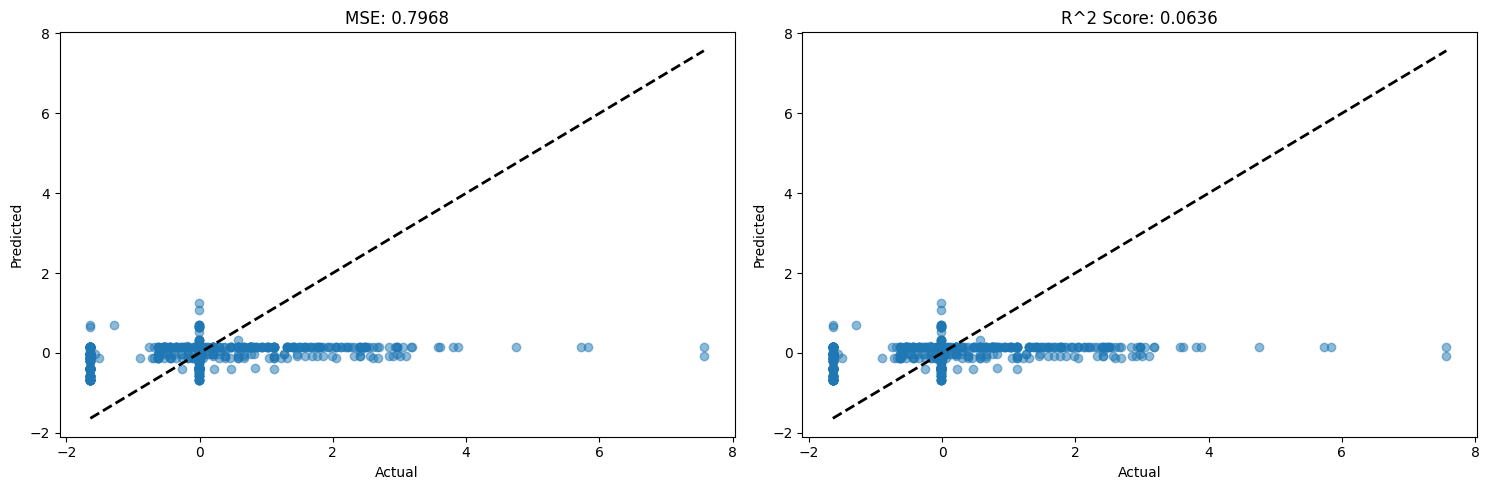

In [ ]:
# Plotting the evaluation metrics using plt library
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mean Squared Error (MSE)
axs[0].scatter(y_test, y_pred_test_linear_reg, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[0].set_title(f'MSE: {mse_test_linear_reg:.4f}')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# R^2 Score
axs[1].scatter(y_test, y_pred_test_linear_reg, alpha=0.5)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_title(f'R^2 Score: {r2_test_linear_reg:.4f}')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs_lr = GridSearchCV(estimator = LinearRegression(),
                  param_grid = {'fit_intercept': [True, False]},
                                cv=5,scoring='neg_mean_squared_error'
                                )

In [ ]:
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
gs_lr.best_score_

-0.9547215951647836

In [ ]:
gs_lr.best_params_

{'fit_intercept': False}

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", gs_lr.best_params_)

Best Hyperparameters: {'fit_intercept': False}


In [ ]:
# Get the best model
best_lr = gs_lr.best_estimator_

In [ ]:
#Final Predictions on test set
y_pred = best_lr.predict(X_test)

In [ ]:
#Final Evaluation
mse_lr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse_lr)

r2_lr = r2_score(y_test, y_pred)
print("R^2 Score on test Set:",r2_lr)

Mean Squared Error on Test Set: 0.7968164042173465
R^2 Score on test Set: 0.06358128689719511


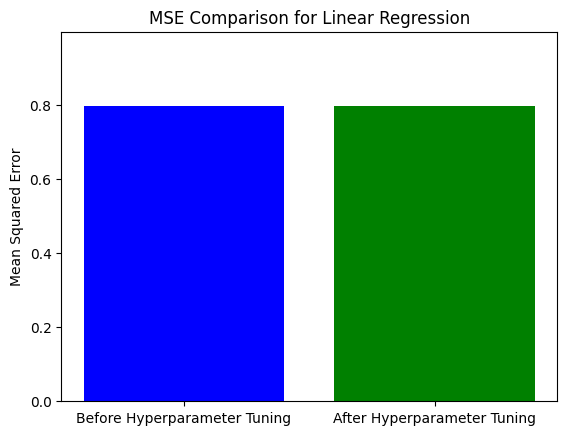

In [ ]:
categories = ['Before Hyperparameter Tuning', 'After Hyperparameter Tuning']
mse_values = [mse_test_linear_reg, mse_lr]

# Plotting the bar chart
plt.bar(categories, mse_values, color=['blue', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison for Linear Regression')
plt.ylim(0, max(mse_values) + 0.2)
plt.show()

## From the above bar plot we can say that the MSE values havent change after tuning the model. We cannot guarantee that the model should perform better after tuning, this depends on the nature of the dataset also.

# 2 - K-NEAREST NEIGHBOURS (KNN)
### A non-parametric algorithm called K-Nearest Neighbors (KNN) regression locates the K data points that are closest to an input to generate predictions. Next, it chooses the averages their target values for numerical regression.
### In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors. If k = 1, then the output is simply assigned to the value of that single nearest neighbor.

###  To predict a new data point, K-NN Regressor looks through the training data and finds K training data points that are closest to the new data point. From these neighbors the output is the average of the target values of the K nearest neighbors


In [ ]:
#Importing the KNeighborsRegressor from sklearn library
from sklearn.neighbors import KNeighborsRegressor

# Creating the model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Training the model which is called fitting
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predicting on the train, val and test set
y_pred_train_knn = knn_model.predict(X_train)
y_pred_val_knn = knn_model.predict(X_val)
y_pred_test_knn = knn_model.predict(X_test)

In [ ]:
# Finding the Metrics of the model to know the performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train_knn = mean_squared_error(y_train, y_pred_train_knn)
mse_val_knn = mean_squared_error(y_val, y_pred_val_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)

r2_train_knn = r2_score(y_train, y_pred_train_knn)
r2_val_knn = r2_score(y_val, y_pred_val_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)

In [ ]:
#Mean Squared Error and R^2 Score values
print(f'Training Set Mean Squared Error: {mse_train_knn}, R-squared: {r2_train_knn}')
print(f'Validation Set Mean Squared Error: {mse_val_knn}, R-squared: {r2_val_knn}')
print(f'Test Set Mean Squared Error: {mse_test_knn}, R-squared: {r2_test_knn}')

Training Set Mean Squared Error: 0.9567643855383462, R-squared: 0.043235614461653804
Validation Set Mean Squared Error: 0.7640753743707739, R-squared: -0.011527211113641744
Test Set Mean Squared Error: 0.8202509604384366, R-squared: 0.036040994224326384


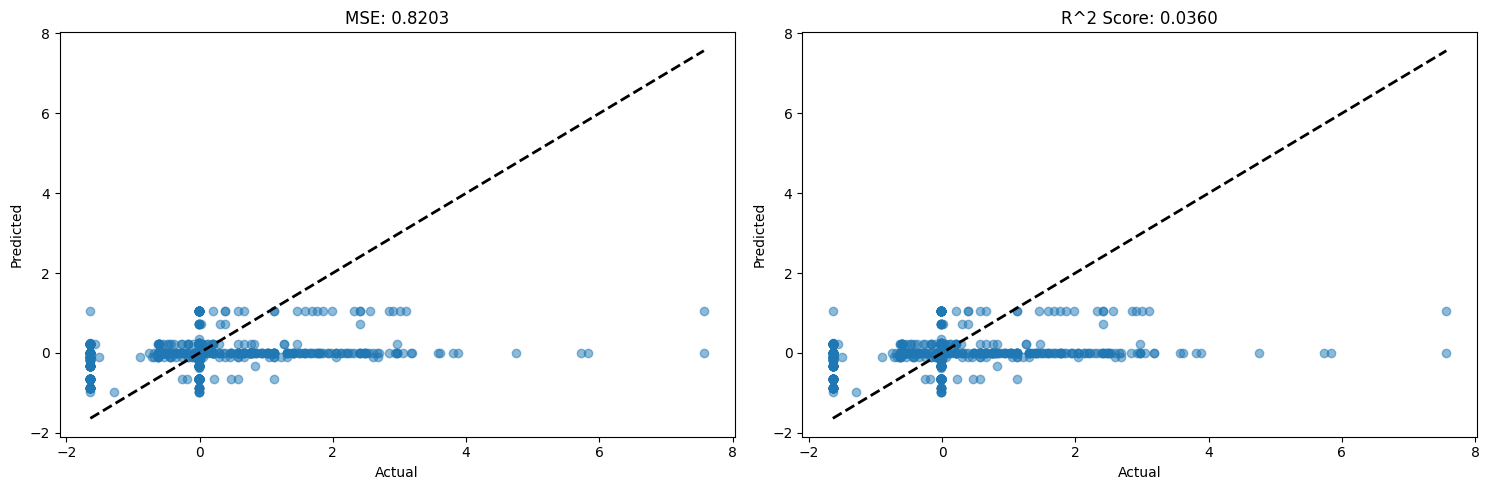

In [ ]:
# Plotting the evaluation metrics using plt library
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mean Squared Error (MSE)
axs[0].scatter(y_test, y_pred_test_knn, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[0].set_title(f'MSE: {mse_test_knn:.4f}')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# R^2 Score
axs[1].scatter(y_test, y_pred_test_knn, alpha=0.5)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_title(f'R^2 Score: {r2_test_knn:.4f}')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Hyperparameter Tuning

### Hyperparameter tuning involves selecting the optimal values for the hyperparameters of a machine learning model. It is a crucial step in the model development process because the choice of hyperparameters can significantly impact the performance of the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs = GridSearchCV(estimator = KNeighborsRegressor(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],},
                                cv=5,
                                )

## The range of the K values, weights, and CV value can be given as the user choice. Here we wanted to tune the model for K value between 1 to 51.

### We are adopting Grid search cross validation method. This process systematically explore a predefined set of hyperparameter combination that yields the best model performance.

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']})

In [ ]:
gs.cv_results_

{'mean_fit_time': array([0.00801525, 0.00953112, 0.00838785, 0.0081233 , 0.00783486,
        0.00800323, 0.00729799, 0.00453944, 0.00458965, 0.00460229,
        0.00465856, 0.00484419, 0.00455437, 0.00507927, 0.00460482,
        0.00465131, 0.0045795 , 0.00464063, 0.00457954, 0.00454545,
        0.00460658, 0.00456724, 0.0045351 , 0.00485334, 0.00483503,
        0.00459042, 0.00458913, 0.00465283, 0.0045372 , 0.00472431,
        0.00461836, 0.00731969, 0.00792408, 0.00809841, 0.00791988,
        0.00798893, 0.00827422, 0.0053174 , 0.00459471, 0.00453548,
        0.00455523, 0.00497923, 0.00462375, 0.00459514, 0.00456524,
        0.00461016, 0.00507846, 0.00453844, 0.00457487, 0.00458074,
        0.00455475, 0.00452833, 0.00456667, 0.00462246, 0.00452523,
        0.00464573, 0.00457683, 0.00474281, 0.00461011, 0.00468283,
        0.00464501, 0.00679045, 0.00826402, 0.00793262, 0.00796194,
        0.00891886, 0.00773067, 0.00520005, 0.00513225, 0.0045609 ,
        0.00460019, 0.00458884,

### Here, param_grid defines the hyperparameter values to be explored during the grid search. The GridSearchCV object is used to perform a cross-validated grid search, and the best hyperparameters are printed. Finally, the best model is used to make predictions on the test set, and the performance is evaluated using the mean squared error.

In [ ]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008015,0.000519,0.136197,0.005658,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",-1.472724,-0.440655,-0.120191,-0.218337,-0.063002,-0.462982,0.521041,99
1,0.009531,0.002244,0.132935,0.002765,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",-1.472724,-0.440655,-0.120191,-0.218337,-0.063002,-0.462982,0.521041,99
2,0.008388,0.000669,0.137003,0.003871,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",-0.276113,-0.189879,-0.008988,0.013850,-0.038739,-0.099974,0.113218,98
3,0.008123,0.000130,0.136913,0.004244,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",-0.276113,-0.189879,-0.008988,0.014185,-0.038899,-0.099939,0.113268,97
4,0.007835,0.000830,0.138752,0.003516,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",-0.061362,-0.042479,-0.168738,-0.015077,0.009756,-0.055580,0.061513,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.007180,0.001345,0.135928,0.025981,48,distance,"{'n_neighbors': 48, 'weights': 'distance'}",0.065953,0.098987,0.085458,0.083539,0.047043,0.076196,0.017966,20
96,0.005259,0.001393,0.083305,0.003812,49,uniform,"{'n_neighbors': 49, 'weights': 'uniform'}",0.065719,0.100968,0.086815,0.081662,0.047886,0.076610,0.018257,13
97,0.004715,0.000284,0.082834,0.001105,49,distance,"{'n_neighbors': 49, 'weights': 'distance'}",0.064055,0.099108,0.086016,0.082621,0.046091,0.075578,0.018517,27
98,0.004573,0.000118,0.084640,0.003982,50,uniform,"{'n_neighbors': 50, 'weights': 'uniform'}",0.065490,0.100186,0.087663,0.082180,0.047150,0.076534,0.018442,14


In [ ]:
gs.best_score_

0.07799772921090682

In [ ]:
gs.best_params_

{'n_neighbors': 31, 'weights': 'uniform'}

## These hyperparameters collectively define the behavior of the KNN regressor. The best combination is determined based on the specified evaluation metric from the grid search.

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", gs.best_params_)

Best Hyperparameters: {'n_neighbors': 31, 'weights': 'uniform'}


In [ ]:
# Get the best model
best_knn = gs.best_estimator_

In [ ]:
#Final Predictions on test set
y_pred = best_knn.predict(X_test)

In [ ]:
#Final Evaluation
mse_knn = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse_knn)

r2_knn = r2_score(y_test, y_pred)
print("R^2 Score on test Set:",r2_knn)

Mean Squared Error on Test Set: 0.7497062133081047
R^2 Score on test Set: 0.11894518768007423


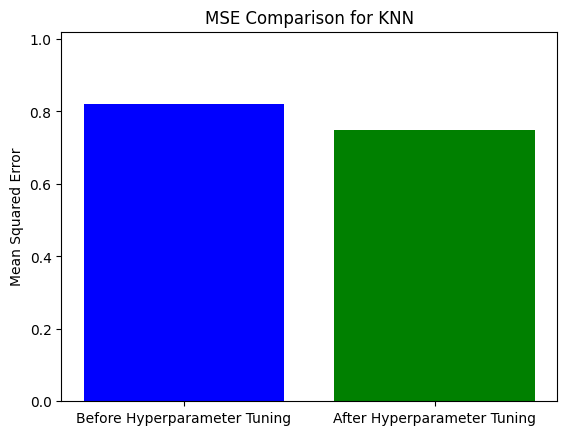

In [ ]:
categories = ['Before Hyperparameter Tuning', 'After Hyperparameter Tuning']
mse_values = [mse_test_knn, mse_knn]

# Plotting the bar chart
plt.bar(categories, mse_values, color=['blue', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison for KNN')
plt.ylim(0, max(mse_values) + 0.2)
plt.show()

### Based upon the new hyperparameters we are able to reduce the Mean Squared Error from 0.82 to 0.749 which is clearly visible in the bar plot. So, with the help of GridSearch Cv, performing hyperparameter tuning we can find the best hyperparameter value for better performance. In our case for 31 number of neighbours we got the best performance. If you increase the range of the K values you might get a better performance of the model.

# RANDOM FOREST

### The random forest is an ensemble model made up of many decision trees that uses the random sampling of training data points when building trees and random subsets of features considered when splitting node.
### Random forest regression makes use of ensemble learning to address regression issues. To produce a prediction that is more accurate, ensemble learning combines predictions from several machine learning algorithms.

In [ ]:
#Importing the RandomForestRegressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model which is called fitting
random_forest_model.fit(X_train, y_train)

<ipython-input-53-9e8fcf0c9b45>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### A Random Forest Regressor consists of collection of decision trees which were constructed using a random subset of the training data and a random subset of features.

### During the training process of each tree, a random subset of the training data using bootstrap sampling. This results in multiple trees, each trained on a slightly different subset of the data.

In [ ]:
# Predicting on the train, val and test set
y_pred_train_random_forest = random_forest_model.predict(X_train)
y_pred_val_random_forest = random_forest_model.predict(X_val)
y_pred_test_random_forest = random_forest_model.predict(X_test)

In [ ]:
# Finding the Metrics of the model to know the performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train_random_forest = mean_squared_error(y_train, y_pred_train_random_forest)
mse_val_random_forest = mean_squared_error(y_val, y_pred_val_random_forest)
mse_test_random_forest = mean_squared_error(y_test, y_pred_test_random_forest)

r2_train_random_forest = r2_score(y_train, y_pred_train_random_forest)
r2_val_random_forest = r2_score(y_val, y_pred_val_random_forest)
r2_test_random_forest = r2_score(y_test, y_pred_test_random_forest)

In [ ]:
#Mean Squared Error and R^2 Score values
print(f'Training Set Mean Squared Error: {mse_train_random_forest}, R-squared: {r2_train_random_forest}')
print(f'Validation Set Mean Squared Error: {mse_val_random_forest}, R-squared: {r2_val_random_forest}')
print(f'Test Set Mean Squared Error: {mse_test_random_forest}, R-squared: {r2_test_random_forest}')

Training Set Mean Squared Error: 0.909067173324499, R-squared: 0.09093282667550096
Validation Set Mean Squared Error: 0.6967538312889033, R-squared: 0.07759694470351264
Test Set Mean Squared Error: 0.7471716975696672, R-squared: 0.12192375081402185


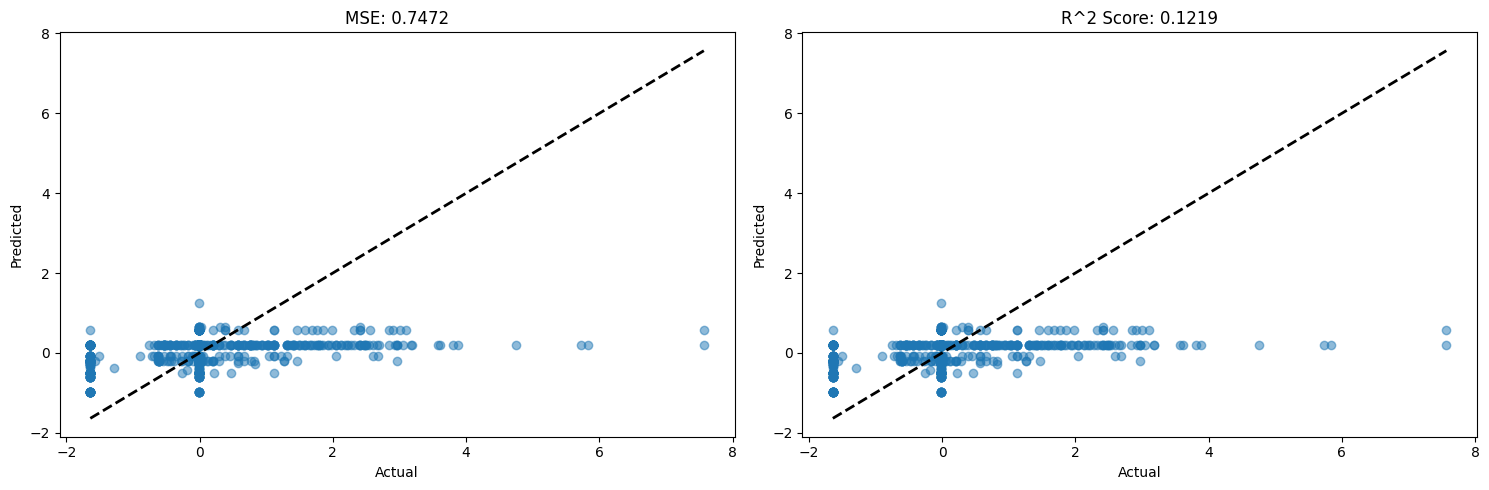

In [ ]:
# Plotting the evaluation metrics using plt library
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mean Squared Error (MSE)
axs[0].scatter(y_test, y_pred_test_random_forest, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[0].set_title(f'MSE: {mse_test_random_forest:.4f}')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# R^2 Score
axs[1].scatter(y_test, y_pred_test_random_forest, alpha=0.5)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_title(f'R^2 Score: {r2_test_random_forest:.4f}')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [ ]:
y_train_flat = y_train.ravel()
y_val_flat = y_val.ravel()
y_test_flat = y_test.ravel()

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator = RandomForestRegressor(),
                  param_grid = {
                                'n_estimators': [50, 100, 200, 300],
                                'max_depth': [None, 10, 20, 30],
                                'min_samples_split': [2, 5, 10],
                                'min_samples_leaf': [1, 2, 4],
                                'bootstrap': [True, False]},
                                cv=5,
                                scoring='neg_mean_squared_error'
                                )

### In the above you can clearly see the range of number of estimators, max_depth, min_samples_split,etc which are given by us. It is upto the programmer to give the range of hyperparameters that are available or simply go on with single hyperparameter also. But for better tuning we use the required hyperparameters.

In [ ]:
gs.fit(X_train, y_train_flat)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_score_

-0.9125217046124842

In [ ]:
gs.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", gs.best_params_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
# Get the best model
best_rf = gs.best_estimator_

In [ ]:
#Final Predictions
y_pred = best_rf.predict(X_test)

In [ ]:
#Final Evaluation
mse_rf = mean_squared_error(y_test_flat, y_pred)
print("Mean Squared Error on Test Set:", mse_rf)

r2_rf = r2_score(y_test_flat, y_pred)
print("R^2 Score on test Set:",r2_rf)

Mean Squared Error on Test Set: 0.7451693969927626
R^2 Score on test Set: 0.12427685464013039


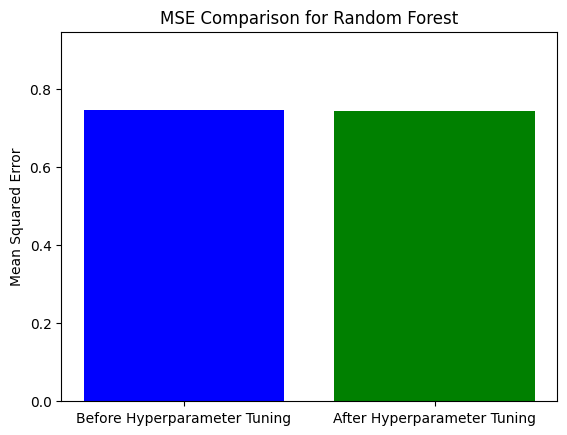

In [ ]:
categories = ['Before Hyperparameter Tuning', 'After Hyperparameter Tuning']
mse_values = [mse_test_random_forest, mse_rf]

# Plotting the bar chart
plt.bar(categories, mse_values, color=['blue', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison for Random Forest')
plt.ylim(0, max(mse_values) + 0.2)
plt.show()

### From the plot we can directly say that there is no change in MSE value before and after hyperparameter tuning. But when you have a closer look in the values there is a very very slight drop in the MSE value, which can be seen above.

# SUPPORT VECTOR MACHINE With Linear Kernel

### For linearly separable or nearly linearly separable data, A Support Vector Machine (SVM) with a linear kernel is used to find a linear relationship between the input features and the target variable by predicting a continuous output variable, in context of regression.
### Regression using Support Vector Machines (SVM) can employ both linear and non-linear kernels. A straightforward dot product of two input vectors is a linear kernel. When data is linearly separable—that is, when it can be divided using a single line—it is frequently used. It's also frequently applied in situations where a data set contains a lot of features.


In [ ]:
#Importing the SVR from sklearn library
from sklearn.svm import SVR

# Creating the model
linear_svm_model = SVR(kernel="linear", C=10)

# Training the model which is called fitting
linear_svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, kernel='linear')

In [ ]:
# Predicting on the train, val and test set
y_pred_train_linear_svm = linear_svm_model.predict(X_train)
y_pred_val_linear_svm = linear_svm_model.predict(X_val)
y_pred_test_linear_svm = linear_svm_model.predict(X_test)

In [ ]:
# Finding the Metrics of the model to know the performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train_linear_svm = mean_squared_error(y_train, y_pred_train_linear_svm)
mse_val_linear_svm = mean_squared_error(y_val, y_pred_val_linear_svm)
mse_test_linear_svm = mean_squared_error(y_test, y_pred_test_linear_svm)

r2_train_linear_svm = r2_score(y_train, y_pred_train_linear_svm)
r2_val_linear_svm = r2_score(y_val, y_pred_val_linear_svm)
r2_test_linear_svm = r2_score(y_test, y_pred_test_linear_svm)

In [ ]:
#Mean Squared Error and R^2 Score values
print(f'Training Set Mean Squared Error: {mse_train_linear_svm}, R-squared: {r2_train_linear_svm}')
print(f'Validation Set Mean Squared Error: {mse_val_linear_svm}, R-squared: {r2_val_linear_svm}')
print(f'Test Set Mean Squared Error: {mse_test_linear_svm}, R-squared: {r2_test_linear_svm}')

Training Set Mean Squared Error: 0.9710080752153212, R-squared: 0.028991924784678824
Validation Set Mean Squared Error: 0.729983873117207, R-squared: 0.033605091722444524
Test Set Mean Squared Error: 0.8168385372371866, R-squared: 0.040051274291056926


### MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance. In this case, the Training Set MSE is lower than the Validation and Test Set MSE

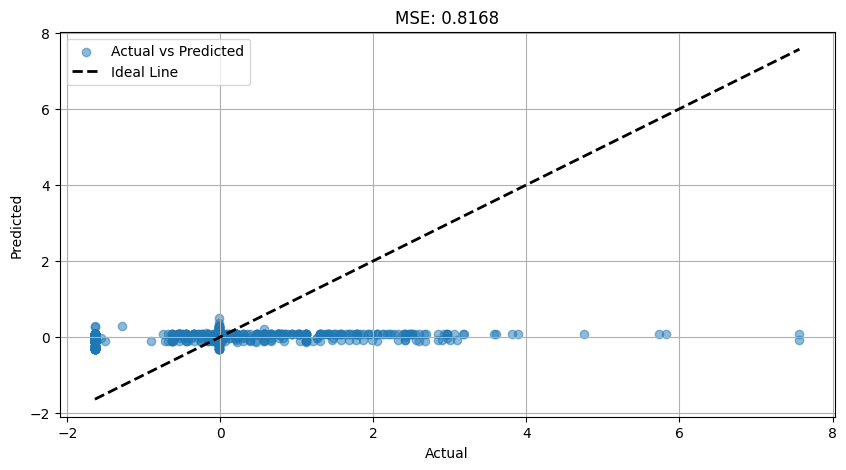

In [ ]:
# Plotting the evaluation metrics using plt library
plt.figure(figsize=(10, 5))

# Mean Squared Error (MSE)
plt.scatter(y_test, y_pred_test_linear_svm, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Line')
plt.title(f'MSE: {mse_test_linear_svm:.4f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator = SVR(kernel="linear"),
                  param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100]},
                                cv=5,
                                scoring='neg_mean_squared_error'
                                )

### Similarly as done in earlier cases the C value range is set and the scoring is default which is meqn squared error.

In [ ]:
# Fitting the model to the training data
gs.fit(X_train, y_train_flat)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_score_

-0.9710064211976924

In [ ]:
gs.best_params_

{'C': 0.01}

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", gs.best_params_)

Best Hyperparameters: {'C': 0.01}


In [ ]:
# Get the best model
best_linear_svm = gs.best_estimator_

In [ ]:
#Final Predictions
y_pred = best_linear_svm.predict(X_test)

In [ ]:
#Final Evaluation
mse_linear_svm = mean_squared_error(y_test_flat, y_pred)
print("Mean Squared Error on Test Set:", mse_linear_svm)

r2_linear_svm = r2_score(y_test_flat, y_pred)
print("R^2 Score on test Set:",r2_linear_svm)

Mean Squared Error on Test Set: 0.8168184633093586
R^2 Score on test Set: 0.04007486517292658


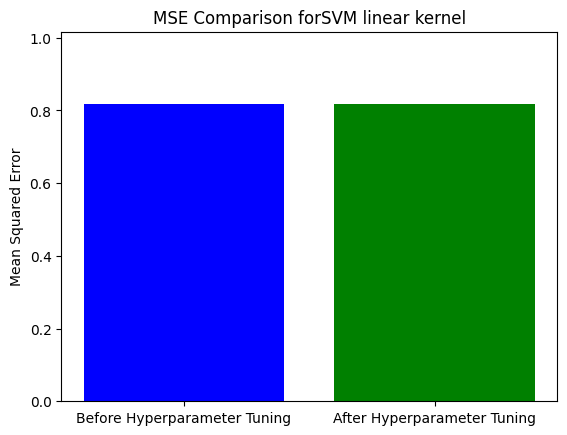

In [ ]:
categories = ['Before Hyperparameter Tuning', 'After Hyperparameter Tuning']
mse_values = [mse_test_linear_svm, mse_linear_svm]

# Plotting the bar chart
plt.bar(categories, mse_values, color=['blue', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison forSVM linear kernel')
plt.ylim(0, max(mse_values) + 0.2)
plt.show()

# SUPPORT VECTOR MACHINE With nonLinear Kernel = Gaussian RBF

### The kernel trick is a technique used in SVMs to implicitly map the input features into a higher-dimensional space without explicitly calculating the transformation. The Gaussian RBF kernel uses the radial basis function to measure the similarity between data points in this higher-dimensional space.

### Complex patterns and nonlinear relationships between features can be captured using Support Vector Machine (SVM) regression with a nonlinear kernel.

In [ ]:
#Importing the SVR from sklearn library
from sklearn.svm import SVR

# Creating the model
nonlinear_svm_model = SVR(kernel="rbf", gamma=1)

# Training the model which is called fitting
nonlinear_svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma=1)

In [ ]:
# Predicting on the train, val and test set
y_pred_train_nonlinear_svm = nonlinear_svm_model.predict(X_train)
y_pred_val_nonlinear_svm = nonlinear_svm_model.predict(X_val)
y_pred_test_nonlinear_svm = nonlinear_svm_model.predict(X_test)

In [ ]:
# Finding the Metrics of the model to know the performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train_nonlinear_svm = mean_squared_error(y_train, y_pred_train_nonlinear_svm)
mse_val_nonlinear_svm = mean_squared_error(y_val, y_pred_val_nonlinear_svm)
mse_test_nonlinear_svm = mean_squared_error(y_test, y_pred_test_nonlinear_svm)

r2_train_nonlinear_svm = r2_score(y_train, y_pred_train_nonlinear_svm)
r2_val_nonlinear_svm = r2_score(y_val, y_pred_val_nonlinear_svm)
r2_test_nonlinear_svm = r2_score(y_test, y_pred_test_nonlinear_svm)

In [ ]:
#Mean Squared Error and R^2 Score values
print(f'Training Set Mean Squared Error: {mse_train_nonlinear_svm}, R-squared: {r2_train_nonlinear_svm}')
print(f'Validation Set Mean Squared Error: {mse_val_nonlinear_svm}, R-squared: {r2_val_nonlinear_svm}')
print(f'Test Set Mean Squared Error: {mse_test_nonlinear_svm}, R-squared: {r2_test_nonlinear_svm}')

Training Set Mean Squared Error: 0.9524134851387455, R-squared: 0.047586514861254536
Validation Set Mean Squared Error: 0.7224731728960402, R-squared: 0.04354819145194955
Test Set Mean Squared Error: 0.7999616284907239, R-squared: 0.059885019035605724


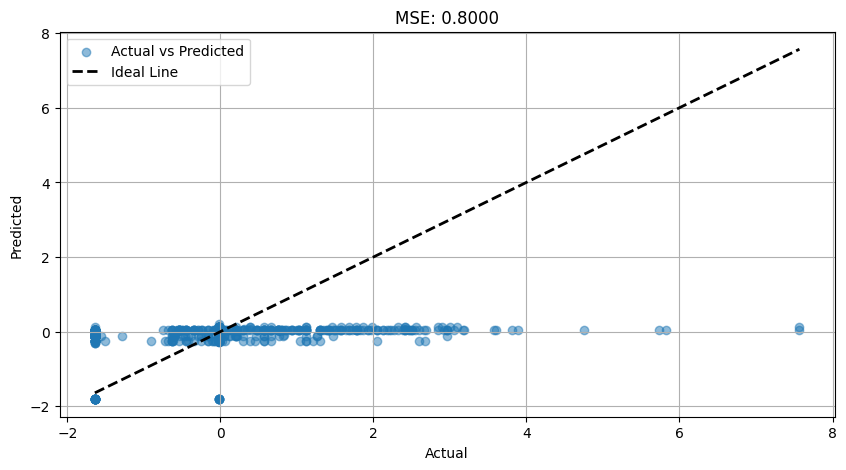

In [ ]:
# Plotting the evaluation metrics using plt library
plt.figure(figsize=(10, 5))

# Mean Squared Error (MSE)
plt.scatter(y_test, y_pred_test_nonlinear_svm, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Line')
plt.title(f'MSE: {mse_test_nonlinear_svm:.4f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator = SVR(kernel="rbf"),
                  param_grid = {'C': [ 0.01, 0.1, 1, 10],
                                'gamma': [0.01, 0.1, 1, 10]},
                                cv=5,
                                scoring='neg_mean_squared_error'
                                )

In [ ]:
# Fitting the model to the training data
gs.fit(X_train, y_train_flat)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_score_

-0.9529123046978105

In [ ]:
gs.best_params_

{'C': 0.1, 'gamma': 10}

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", gs.best_params_)

Best Hyperparameters: {'C': 0.1, 'gamma': 10}


In [ ]:
# Get the best model
best_nonlinear_svm = gs.best_estimator_

In [ ]:
#Final Predictions
y_pred = best_nonlinear_svm.predict(X_test)

In [ ]:
#Final Evaluation
mse_nonlinear_svm = mean_squared_error(y_test_flat, y_pred)
print("Mean Squared Error on Test Set:", mse_nonlinear_svm)

r2_nonlinearsvm = r2_score(y_test_flat, y_pred)
print("R^2 Score on test Set:",r2_nonlinearsvm)

Mean Squared Error on Test Set: 0.7896466954496314
R^2 Score on test Set: 0.07200712931465902


# GRADIENT BOOSTING

## To perform Sequential Training & to ensemble weak learners we adopted Gradient Boosting.

In [ ]:
#Importing the ensemble GradientBoostingRegressor from sklearn library
from sklearn.ensemble import GradientBoostingRegressor

# Creating the model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model which is called fitting
gradient_boosting_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [ ]:
# Predicting on the test set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

In [ ]:
# Finding the Metrics of the model to know the performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)

r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

In [ ]:
print(f'Test Set Mean Squared Error: {mse_gradient_boosting}, R-squared: {r2_gradient_boosting}')

Test Set Mean Squared Error: 0.7452345202098671, R-squared: 0.12420032182927032


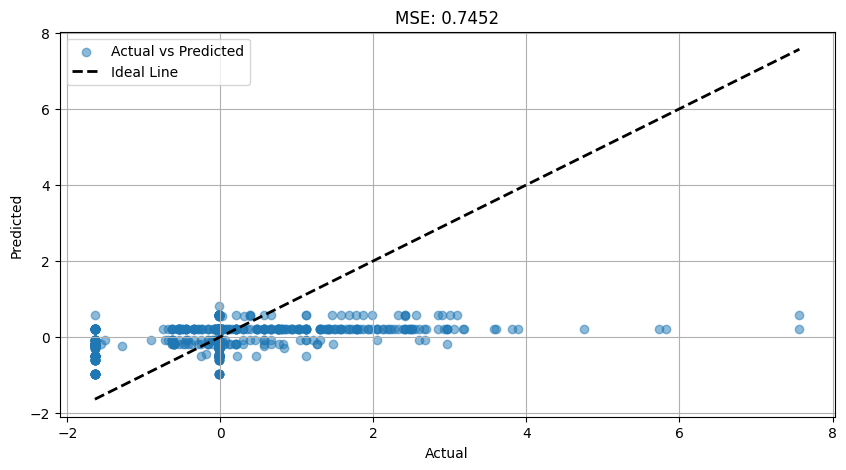

In [ ]:
# Plotting the evaluation metrics using plt library
plt.figure(figsize=(10, 5))

# Mean Squared Error (MSE)
plt.scatter(y_test, y_pred_gradient_boosting, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Line')
plt.title(f'MSE: {mse_gradient_boosting:.4f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator =  GradientBoostingRegressor(),
                  param_grid = {
                                'n_estimators': [50, 100, 200],
                                'learning_rate': [0.01, 0.1, 0.2],},
                                cv=5,
                                scoring='neg_mean_squared_error'
                                )

In [ ]:
# Fitting the model to the training data
gs.fit(X_train, y_train_flat)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_score_

-0.9135105607418353

In [ ]:
gs.best_params_

{'learning_rate': 0.2, 'n_estimators': 50}

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", gs.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 50}


In [ ]:
# Get the best model
best_gb = gs.best_estimator_

In [ ]:
#Final Predictions
y_pred = best_gb.predict(X_test)

In [ ]:
#Final Evaluation
mse_gb = mean_squared_error(y_test_flat, y_pred)
print("Mean Squared Error on Test Set:", mse_gb)

r2_gb = r2_score(y_test_flat, y_pred)
print("R^2 Score on test Set:",r2_gb)

Mean Squared Error on Test Set: 0.7455631440272172
R^2 Score on test Set: 0.12381412308824391


#MSE Values before Hyperparameter Tuning

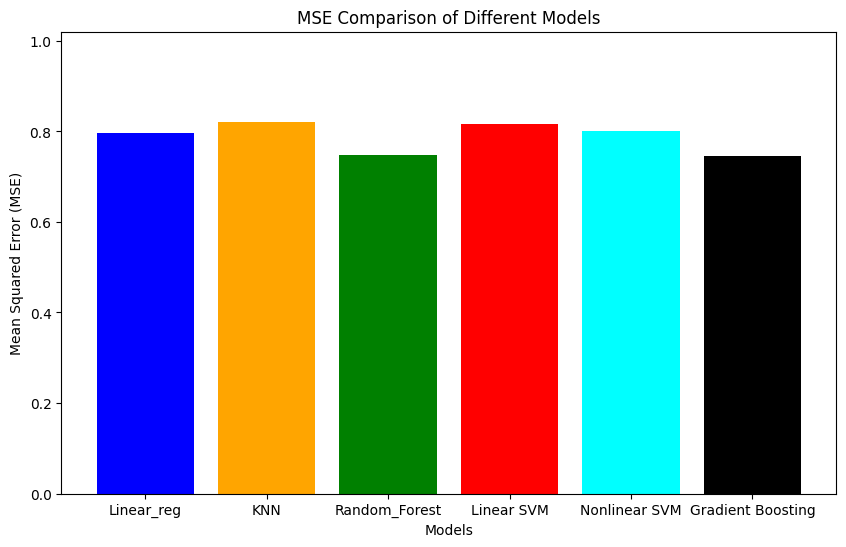

In [ ]:
#List of all the models we have created
model_names = ['Linear_reg', 'KNN', 'Random_Forest', 'Linear SVM', 'Nonlinear SVM', 'Gradient Boosting']
mse_values = [mse_test_linear_reg, mse_test_knn, mse_test_random_forest, mse_test_linear_svm,mse_test_nonlinear_svm, mse_gradient_boosting]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'orange', 'green', 'red', 'cyan', 'black'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of Different Models')
plt.ylim(0, max(mse_values) + 0.2)
plt.show()

### The presented bar plot showcases the Mean Squared Error (MSE) results for models built on the test data. Notably, the Random Forest model demonstrates the lowest MSE among all considered models, indicating superior predictive accuracy. This robust performance can be attributed to the model's unique strength in random subset feature selection, allowing it to extract optimal predictive insights from the dataset. The effectiveness of Random Forest in minimizing MSE underscores its capability to provide accurate predictions and highlights its suitability for the inherent complexities of our dataset.

#MSE Values after Hyperparameter Tuning

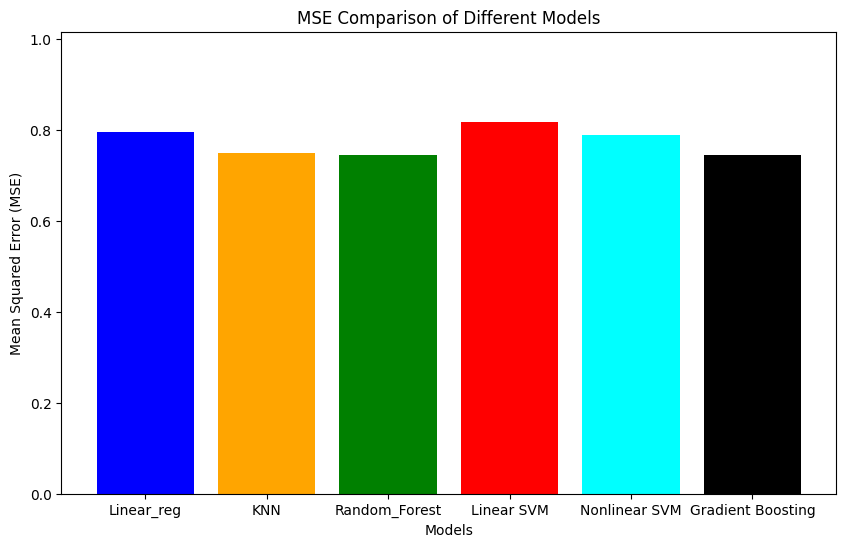

In [ ]:
#List of all the models we have created
model_names = ['Linear_reg', 'KNN', 'Random_Forest', 'Linear SVM', 'Nonlinear SVM', 'Gradient Boosting']
mse_values = [mse_test_linear_reg, mse_knn, mse_rf, mse_linear_svm,mse_nonlinear_svm, mse_gb]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'orange', 'green', 'red', 'cyan', 'black'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of Different Models')
plt.ylim(0, max(mse_values) + 0.2)
plt.show()

##  The above bar plot is the (MSE) values of the models after hyperparametr tuning. It is clearly visible that there is drop in (MSE) values compared to before hyperparameter tuning. This is the reason hyperparameter tuning is important to get the best performance of the models. You can change the range of values in the parameter grids to get the best performance of the respective model. Parameter range affects the computational cost.